# Hexdropper Tutorial

This tutorial demonstrates the use of `hexdropper` to extract the hex colour code from a cropped image, which can then be used to create complimentary graphics. 

We aim to determine the hex colour code of the UBC MDS Logo, which we will then use as an input to a matplotlib object to create a complimentary graphic. Here is the image we will be using for this tutorial.

![Cropped image of UBC MDS Logo](../tests/images/uncropped_img.png)

## Set up
First, we must import the required libraries.

In [1]:
from hexdropper import read_image
from hexdropper.most_common_rgb import most_common_rgb 
from hexdropper.rgb_to_hex import rgb_to_hex
from matplotlib import pyplot as plt # Importing this for a demo at end - not sure if it will be redundant with create_colour_image
import numpy as np

## Read image
Start by reading in a cropped image containing the colour you would like to match, using the `read_image` function and specifying the path to the image on your device. The image does not need to be perfectly cropped, as long as the colour you are interested in is most prominent.

In [2]:
image = read_image.read_image('../tests/images/uncropped_img.png')

## Obtaining the most common RGB
Now that cropped image has been imported as an array, we can extract the RGB values from the image. 

Sometimes, it might not be feasible to crop an image perfectly. For instance, a user may have missed a few dark pixels at the edge of the cropped image, or perhaps, the image itself is a bit noisy. To account for these situations, the function `most_common_rgb` takes the most common RGB value in the cropped image and outputs it as a tuple that corresponds to the red, green, and blue channels respectively.

In [3]:
rgb_val = most_common_rgb(image)
print(f"This is the most common set of RGB value in the cropped image: {rgb_val}")

This is the most common set of RGB value in the cropped image: (8, 181, 212)


We can check that the output matches the correct colour: 

![Check the output with a colour picker](img/rgb_color.png)

## Converting RGB to Hexadecimal Format

Once we have obtained the most common RGB value from an image using the most_common_rgb function, the next step might be to convert this RGB value to a more universally recognized color format - hexadecimal. This is where the `rgb_to_hex` function comes in. It efficiently converts RGB color values to their corresponding hexadecimal color codes. This is especially useful in contexts such as web design or graphic editing, where colors are often specified in hexadecimal format.

The `rgb_to_hex` function can accept either three separate integers representing the red, green and blue color channels, or a single tuple containing these three integers. It returns a string representing the color in hexadecimal format.

#### Example 1: Passing Separate Integers
We can pass the RGB values as three separate arguments to the rgb_to_hex function. Given the most common RGB value in your cropped image is (8, 181, 212), the call to the function would look like this:

In [4]:
rgb_to_hex(8, 181, 212)

'#08B5D4'

#### Example 2: Passing a Single Tuple
We can also pass the RGB values as a single tuple. This is particularly useful if you already have the RGB values grouped together in a tuple format. 

In [5]:
rgb_to_hex((8, 181, 212))

'#08B5D4'

Both methods will yield the same result as "#08B5D4", which is the hexadecimal representation of the color with RGB values (8, 181, 212). The choice between separate integers and a single tuple depends on how the data is structured in your application.

## Use the hexcode to create complimentary visualizations for your project!
Now that you know the hexcode of that logo, you can create visualizations that are a perfect colour match. Here is an example using `matplotlib` specifying the hexcode as a parameter.

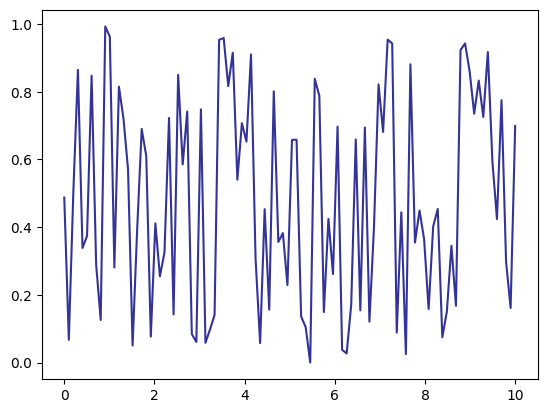

In [6]:
x = np.linspace(0,10,100)
y = np.random.rand(len(x))
plt.plot(x,y,'#333399')